<h3>Data Cleaning & Preprocessing</h3>
 <h4>Step-by-Step Objectives</h4>
We’ll clean your dataset by addressing the following:

Understand structure and summary

Handle missing values

Remove duplicates

Standardize columns

Detect & handle outliers

Save cleaned data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Display all columns
pd.set_option('display.max_columns', None)

Data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a dataset. It is a foundational task in data science and is essential for ensuring high-quality, reliable analysis and modeling.


<h3>Load Data</h3>

In [9]:
df = pd.read_csv("AB_NYC_2019.csv")  
print(df.head())
print(df.info())
print(df.shape)

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

<h3>Check For Missing Value</h3>

Missing values:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


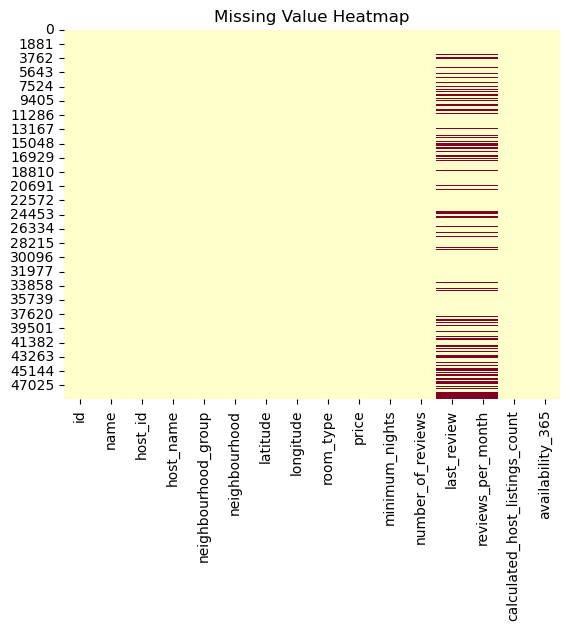

In [10]:
# Count of missing values per column
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Value Heatmap")
plt.show()
#HANDLE MISSING VALUES
# Fill missing reviews_per_month with 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Fill missing last_review with a placeholder or drop
df['last_review'] = df['last_review'].fillna('No Review')

# Drop any rows still containing missing values (optional)
df.dropna(inplace=True)


<h3>Remove Duplicates</h3>

In [11]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

df.drop_duplicates(inplace=True)



Duplicate rows: 0


<h3>Standardize Formats</h3>

In [12]:
# Convert column names to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Ensure 'last_review' is datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Convert text fields to lowercase
df['host_name'] = df['host_name'].str.lower()
df['neighbourhood'] = df['neighbourhood'].str.lower()


<h3>Detect and Handle Outlier</h3>

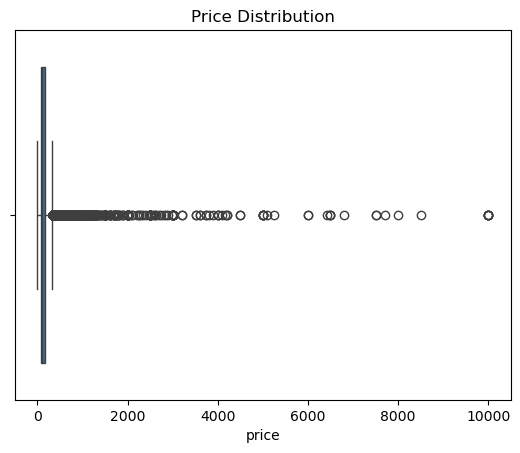

In [13]:
sns.boxplot(data=df, x='price')
plt.title("Price Distribution")
plt.show()

#Remove extreme outliers (price > 1000):

df = df[df['price'] <= 1000]


<h3>Save Cleaned Data</h3>

In [7]:
df.to_csv("cleaned_airbnb_data.csv", index=False)
print("Cleaned dataset saved.")


Cleaned dataset saved.


| Cleaning Task     | Method Used                               |
| ----------------- | ----------------------------------------- |
| Missing Values    | Filled `reviews_per_month`, `last_review` |
| Duplicate Rows    | Removed via `drop_duplicates()`           |
| Column Formatting | Renamed columns, standardized strings     |
| Date Conversion   | Converted `last_review` to datetime       |
| Outlier Removal   | Removed rows with `price > 1000`          |
